<a href="https://colab.research.google.com/github/AkashSky47/PA1_CE605_231030004/blob/main/PA1_CE605_231030004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

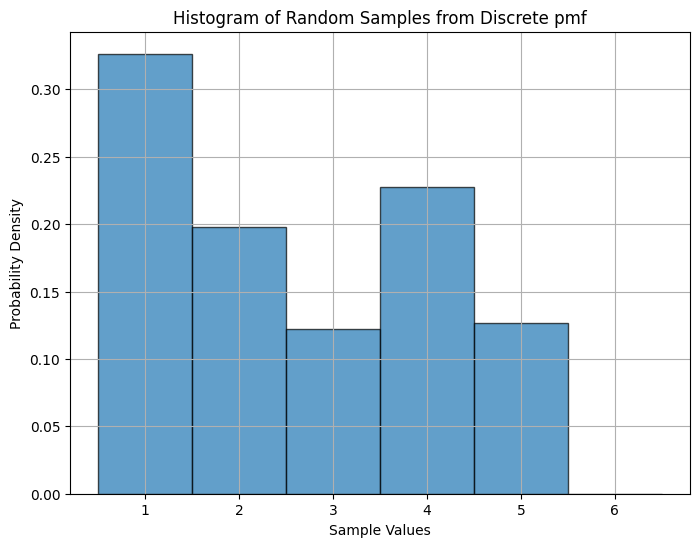

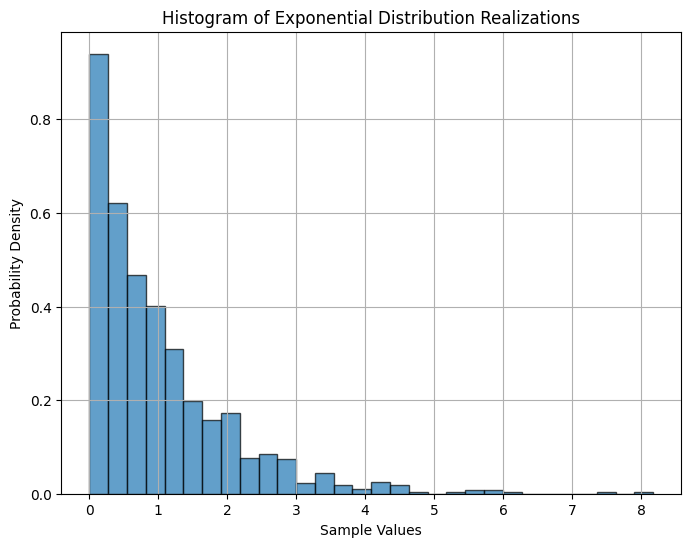

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For Part (a):
# Given discrete probability values for a random variable X
X_values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Calculate cumulative distribution function (CDF) from the pmf
cdf = np.cumsum(pmf)

# Generate 500 random samples using inverse transform method
np.random.seed(42)
uniform_samples = np.random.rand(500)
inverse_transform_samples = np.searchsorted(cdf, uniform_samples)

# Plot a histogram for the generated samples
plt.figure(figsize=(8, 6))
plt.hist(inverse_transform_samples, bins=np.arange(0.5, 7.5, 1), density=True, alpha=0.7, edgecolor='black')
plt.title('Histogram of Random Samples from Discrete pmf')
plt.xlabel('Sample Values')
plt.ylabel('Probability Density')
plt.xticks(np.arange(1, 7, 1))
plt.grid(True)
plt.show()

# For Part (b):
# Defining functions for an exponential distribution
def exponential_pdf(x, lmbda=1):
    return lmbda * np.exp(-lmbda * x)

def inverse_exponential_cdf(p, lmbda=1):
    return -np.log(1 - p) / lmbda

# Generating 1000 realizations of the random variable X from exponential distribution
num_samples_exp = 1000
uniform_samples_exp = np.random.rand(num_samples_exp)
exponential_samples = inverse_exponential_cdf(uniform_samples_exp)

# Plotting a histogram for the generated exponential samples
plt.figure(figsize=(8, 6))
plt.hist(exponential_samples, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.title('Histogram of Exponential Distribution Realizations')
plt.xlabel('Sample Values')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


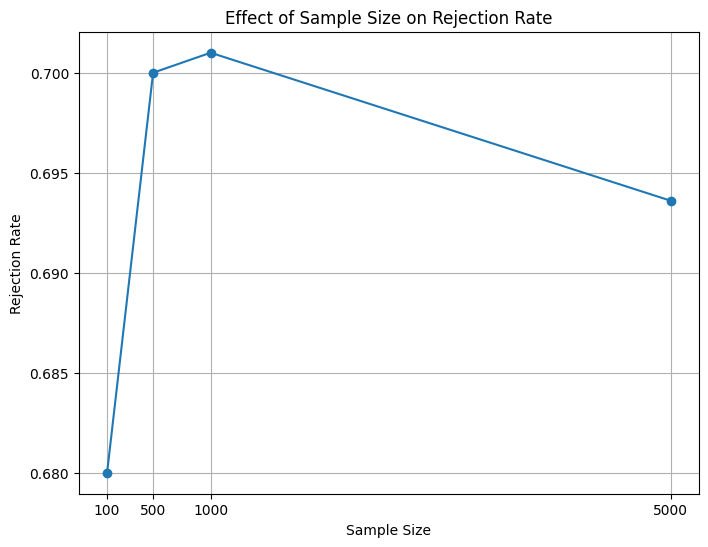

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution (standard normal distribution parameters)
mu, sigma = 0, 1

# Function to check if a sample falls within the standard normal distribution region
def within_normal_dist(sample):
    return abs(sample - mu) <= 3 * sigma  # Considering within 3 standard deviations

# Rejection method simulation
def rejection_method(sample_size):
    uniform_samples = np.random.uniform(0, 10, sample_size)  # Generating uniform samples
    accepted_samples = [sample for sample in uniform_samples if within_normal_dist(sample)]
    rejected_samples = sample_size - len(accepted_samples)
    return accepted_samples, rejected_samples

# Generate samples and calculate rejection rates for different sample sizes
sample_sizes = [100, 500, 1000, 5000]
rejection_rates = []

for size in sample_sizes:
    accepted, rejected = rejection_method(size)
    rejection_rate = rejected / size
    rejection_rates.append(rejection_rate)

# Plotting the impact of sample size on rejection rates
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, rejection_rates, marker='o')
plt.title('Effect of Sample Size on Rejection Rate')
plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.xticks(sample_sizes)
plt.grid(True)
plt.show()


In [3]:
import numpy as np

prevalence_rate = 0.01
sensitivity = 0.95
specificity = 0.90
num_simulations = 1000
positive_and_has_disease = 0

for _ in range(num_simulations):
    has_disease = np.random.random() < prevalence_rate
    if has_disease and np.random.random() < sensitivity:
        positive_and_has_disease += 1
    elif not has_disease and np.random.random() < (1 - specificity):
        positive_and_has_disease += 1

probability_positive_given_disease = positive_and_has_disease / num_simulations
estimated_probability = (probability_positive_given_disease * prevalence_rate) / (
        probability_positive_given_disease * prevalence_rate + (1 - probability_positive_given_disease) * (1 - prevalence_rate))

print("Estimated probability of having the disease given a positive test result:", estimated_probability)


Estimated probability of having the disease given a positive test result: 0.0012341764985620144
